In [1]:
# Importamos las librerías pandas, numpy, matplotlib respectivamente

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice

df_vistazo = pd.read_excel('microretailer.xlsx')

In [4]:
# Elección de variables (13) para este dataframe
df1_1 = df_vistazo[['210_sales_channels', '189_payment_methods', '193_sales_planning_tools', '18_sales_records', '49_inventory_records', '5_change_store_space_last_year', '184_store_devices', '232_type_of_store', '6_change_employees_average_salary_last_year', '145_number_direct_competitors', '186_internet_connection', '310_burnout', '157_frequency_organize_shelves']]
df1_1

,210_sales_channels,189_payment_methods,193_sales_planning_tools,18_sales_records,49_inventory_records,5_change_store_space_last_year,184_store_devices,232_type_of_store,6_change_employees_average_salary_last_year,145_number_direct_competitors,186_internet_connection,310_burnout,157_frequency_organize_shelves
0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Software especializado,Software especializado + computadora,Software especializado + computadora,No cambió,POS system (i.e. computer + bar code scanner +...,Tailor,No cambió,3.0,yes,no,Semestralmente
1,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,No lo hago,No lo hago,Aumentó 15%,Dataphone (i.e. card payments),Grocery store (aka. nanostore),No cambió,4.0,yes,no,NaN
2,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",NaN,Software especializado + computadora,En Excel,No cambió,"Dataphone (i.e. card payments),POS system (i.e...",Grocery store (aka. nanostore),No cambió,0.0,yes,no,Semanalmente
3,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Software especializado + computadora,Software especializado + computadora,No cambió,POS system (i.e. computer + bar code scanner +...,Grocery store (aka. nanostore),No cambió,4.0,yes,no,Semanalmente
4,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,En papel,En papel,No cambió,Smartphone,Grocery store (aka. nanostore),No cambió,0.0,yes,no,Mensualmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,"Analog cash register,Smartphone",Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,"Analog cash register,Smartphone",Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,Analog cash register,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN


In [5]:
#Identificar valores nulos por columna
valores_nulos= df1_1.isnull().sum()
valores_nulos

210_sales_channels                             89
189_payment_methods                            64
193_sales_planning_tools                       89
18_sales_records                               61
49_inventory_records                           61
5_change_store_space_last_year                 72
184_store_devices                               2
232_type_of_store                               0
6_change_employees_average_salary_last_year    86
145_number_direct_competitors                  68
186_internet_connection                        63
310_burnout                                    64
157_frequency_organize_shelves                 75
dtype: int64

In [6]:
# Realizamos una copia del data frame para el tratado de outliers
df1 = df1_1.copy()
df1 = df1.fillna("Desconocido") 
df1

,210_sales_channels,189_payment_methods,193_sales_planning_tools,18_sales_records,49_inventory_records,5_change_store_space_last_year,184_store_devices,232_type_of_store,6_change_employees_average_salary_last_year,145_number_direct_competitors,186_internet_connection,310_burnout,157_frequency_organize_shelves
0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Software especializado,Software especializado + computadora,Software especializado + computadora,No cambió,POS system (i.e. computer + bar code scanner +...,Tailor,No cambió,3.0,yes,no,Semestralmente
1,WhatsApp,"Efectivo,Transferencia interbancaria",Desconocido,No lo hago,No lo hago,Aumentó 15%,Dataphone (i.e. card payments),Grocery store (aka. nanostore),No cambió,4.0,yes,no,Desconocido
2,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Desconocido,Software especializado + computadora,En Excel,No cambió,"Dataphone (i.e. card payments),POS system (i.e...",Grocery store (aka. nanostore),No cambió,0.0,yes,no,Semanalmente
3,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Software especializado + computadora,Software especializado + computadora,No cambió,POS system (i.e. computer + bar code scanner +...,Grocery store (aka. nanostore),No cambió,4.0,yes,no,Semanalmente
4,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Desconocido,En papel,En papel,No cambió,Smartphone,Grocery store (aka. nanostore),No cambió,0.0,yes,no,Mensualmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,"Analog cash register,Smartphone",Grocery store (aka. nanostore),Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
167,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,"Analog cash register,Smartphone",Grocery store (aka. nanostore),Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
168,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Smartphone,Micro-restaurant (aka. fondita),Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
169,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Analog cash register,Micro-restaurant (aka. fondita),Desconocido,Desconocido,Desconocido,Desconocido,Desconocido


In [7]:
#Identificar valores nulos por columna
valores_nulos1 = df1.isnull().sum()
valores_nulos1

210_sales_channels                             0
189_payment_methods                            0
193_sales_planning_tools                       0
18_sales_records                               0
49_inventory_records                           0
5_change_store_space_last_year                 0
184_store_devices                              0
232_type_of_store                              0
6_change_employees_average_salary_last_year    0
145_number_direct_competitors                  0
186_internet_connection                        0
310_burnout                                    0
157_frequency_organize_shelves                 0
dtype: int64

In [8]:
# Carga del otro archivo .xlsx sin indice

df_vistazo2 = pd.read_excel('ConsumerMit.xlsx')

In [11]:
# Elección de variables (7) para este dataframe
df2_2 = df_vistazo2[['282_payment_method_that_purchase', '283_fulfill_needs', '299_means_transportation_consumer', 'indicate_the_type_of_store', '81_number_online_purchases_month', '309_wiretransfers_in_store', '286_topups']]
df2_2

,282_payment_method_that_purchase,283_fulfill_needs,299_means_transportation_consumer,indicate_the_type_of_store,81_number_online_purchases_month,309_wiretransfers_in_store,286_topups
0,Efectivo,no,A pie,Cafeteria,1,no,No lo hago
1,Efectivo,yes,A pie,Grocery store (aka. nanostore),1,no,Tienda de conveniencia (e.g. OXXO)
2,Efectivo,yes,Automóvil,Micro-restaurant (aka. fondita),0,no,"Supermercado,Tienda de conveniencia (e.g. OXXO)"
3,Tarjeta de débito y/o crédito,yes,Motocicleta,Cafeteria,2,no,No lo hago
4,Efectivo,yes,Transporte público,Cafeteria,2,no,Supermercado
...,...,...,...,...,...,...,...
110,Efectivo,yes,Automóvil,Micro-restaurant (aka. fondita),15,no,No lo hago
111,Efectivo,yes,Transporte público,Cafeteria,1,no,No lo hago
112,Efectivo,yes,A pie,Cafeteria,3,no,Tienda de conveniencia (e.g. OXXO)
113,Efectivo,yes,Didi,Cafeteria,2,no,Tienda de conveniencia (e.g. OXXO)


In [14]:
#Identificar valores nulos por columna
valores_nulos2 = df2_2.isnull().sum()
valores_nulos2

282_payment_method_that_purchase     0
283_fulfill_needs                    0
299_means_transportation_consumer    0
indicate_the_type_of_store           0
81_number_online_purchases_month     0
309_wiretransfers_in_store           2
286_topups                           0
dtype: int64

In [16]:
# Realizamos una copia del data frame para el tratado de outliers
df2 = df2_2.copy()
df2 = df2.fillna("Desconocido") 
df2

,282_payment_method_that_purchase,283_fulfill_needs,299_means_transportation_consumer,indicate_the_type_of_store,81_number_online_purchases_month,309_wiretransfers_in_store,286_topups
0,Efectivo,no,A pie,Cafeteria,1,no,No lo hago
1,Efectivo,yes,A pie,Grocery store (aka. nanostore),1,no,Tienda de conveniencia (e.g. OXXO)
2,Efectivo,yes,Automóvil,Micro-restaurant (aka. fondita),0,no,"Supermercado,Tienda de conveniencia (e.g. OXXO)"
3,Tarjeta de débito y/o crédito,yes,Motocicleta,Cafeteria,2,no,No lo hago
4,Efectivo,yes,Transporte público,Cafeteria,2,no,Supermercado
...,...,...,...,...,...,...,...
110,Efectivo,yes,Automóvil,Micro-restaurant (aka. fondita),15,no,No lo hago
111,Efectivo,yes,Transporte público,Cafeteria,1,no,No lo hago
112,Efectivo,yes,A pie,Cafeteria,3,no,Tienda de conveniencia (e.g. OXXO)
113,Efectivo,yes,Didi,Cafeteria,2,no,Tienda de conveniencia (e.g. OXXO)


In [17]:
#Identificar valores nulos por columna
valores_nulos2_2 = df2.isnull().sum()
valores_nulos2_2

282_payment_method_that_purchase     0
283_fulfill_needs                    0
299_means_transportation_consumer    0
indicate_the_type_of_store           0
81_number_online_purchases_month     0
309_wiretransfers_in_store           0
286_topups                           0
dtype: int64

In [19]:
# Análisis univariado de las variables categóricas (Retailer)

freq_tbl(df1)

                                   210_sales_channels  frequency  percentage  \
0                                         Desconocido         89    0.520468   
1           Redes sociales (e.g. Facebook, Instagram)         11    0.064327   
2                                            WhatsApp         10    0.058480   
3   Redes sociales (e.g. Facebook, Instagram),What...          9    0.052632   
4                             Llamada a Teléfono fijo          6    0.035088   
5                 Llamada a Teléfono celular,WhatsApp          6    0.035088   
6                          Llamada a Teléfono celular          5    0.029240   
7   Llamada a Teléfono celular,Redes sociales (e.g...          5    0.029240   
8   Llamada a Teléfono celular,Llamada a Teléfono ...          3    0.017544   
9                                             Ninguno          3    0.017544   
10                                  Página web propia          3    0.017544   
11  Llamada a Teléfono celular,Llamada a

In [31]:
# Obtengo un análisis univariado de una variable categórica en específico
table1 = freq_tbl(df1['210_sales_channels'])
table1

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro1 = table1[(table1['frequency']>1) & (table1["frequency"] < 89)]
Filtro1

# Ajusto el índice de mi dataframe
Filtro_index1 = Filtro1.set_index('210_sales_channels')
Filtro_index1

# La frecuencia de desconocidos fue de 89

,frequency,percentage,cumulative_perc
210_sales_channels,,,
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",3,0.017544,0.842105
Ninguno,3,0.017544,0.859649


Text(0, 0.5, 'Frecuencia')

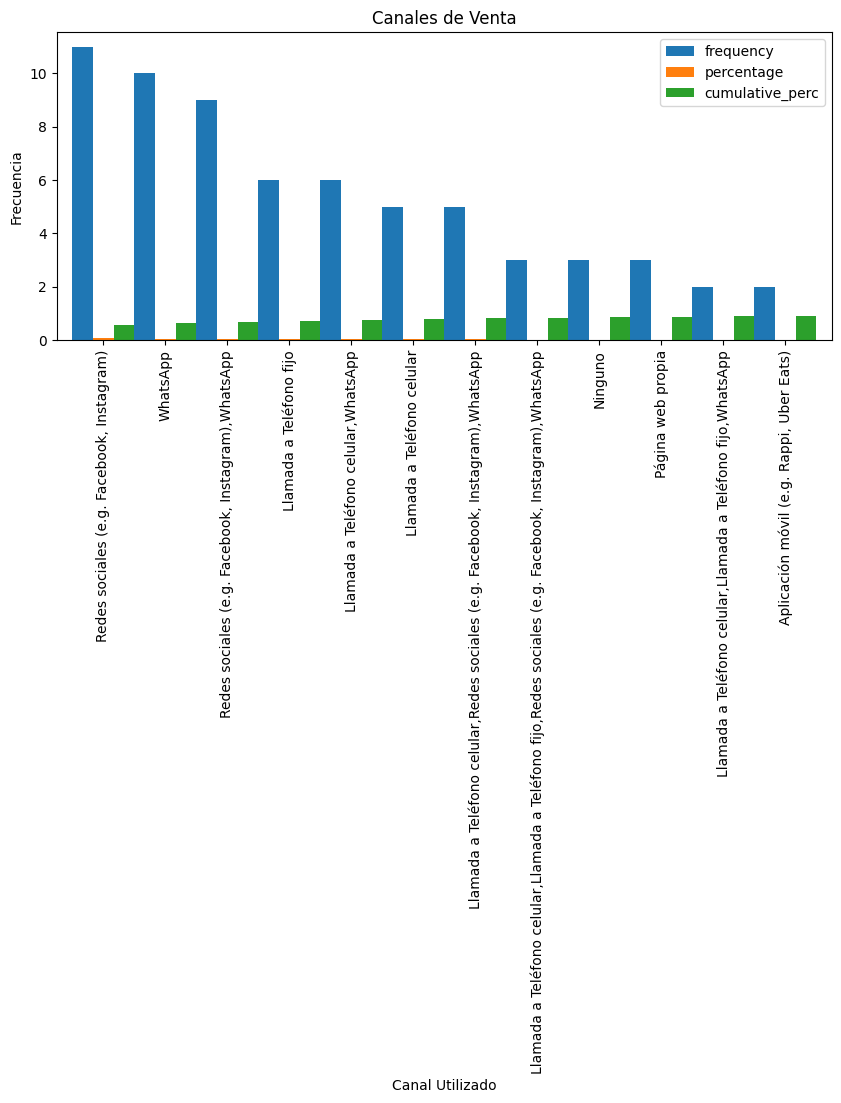

In [32]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index1.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Canales de Venta')
plt.xlabel('Canal Utilizado')
plt.ylabel('Frecuencia')

In [29]:
# Obtengo un análisis univariado de una variable categórica en específico
table2 = freq_tbl(df1['189_payment_methods'])
table2

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro2 = table2[(table2['frequency']>1) & (table2["frequency"] < 64)]
Filtro2

# Ajusto el índice de mi dataframe
Filtro_index2 = Filtro2.set_index('189_payment_methods')
Filtro_index2

# La frecuencia de desconocidos fue de 64

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


Text(0, 0.5, 'Frecuencia')

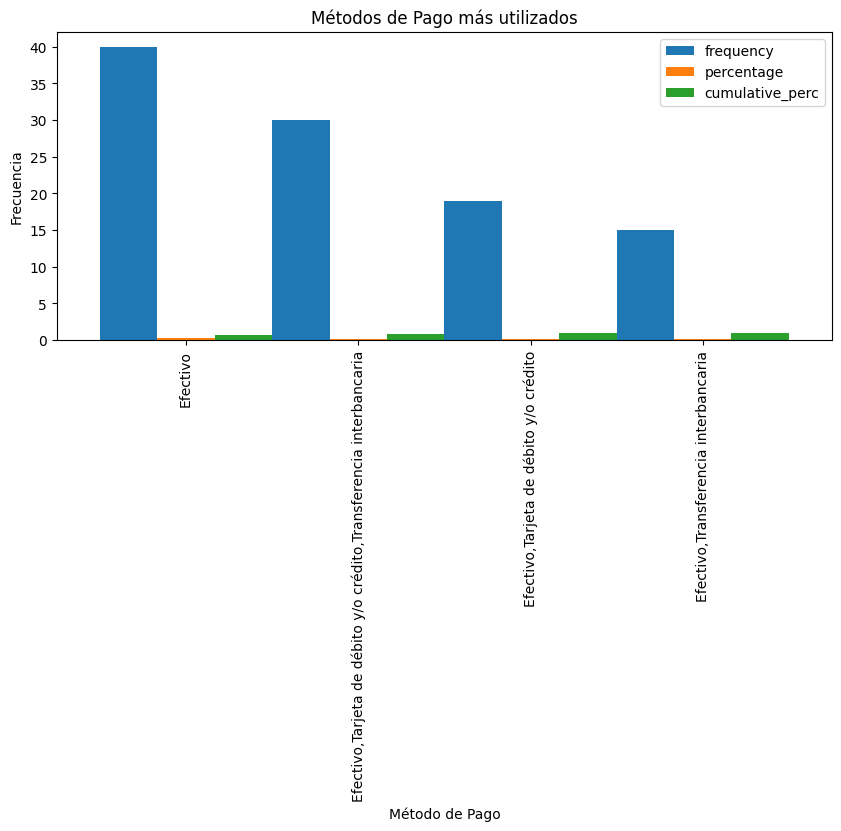

In [30]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index2.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Métodos de Pago más utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')

In [33]:
# Obtengo un análisis univariado de una variable categórica en específico
table3 = freq_tbl(df1['193_sales_planning_tools'])
table3

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro3 = table3[(table3['frequency']>1) & (table3["frequency"] < 89)]
Filtro3

# Ajusto el índice de mi dataframe
Filtro_index3 = Filtro3.set_index('193_sales_planning_tools')
Filtro_index3

# La frecuencia de desconocidos fue de 89

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433
"Cuaderno,Excel",3,0.017544,0.923977
"Cuaderno,Ninguna",2,0.011696,0.935673


Text(0, 0.5, 'Frecuencia')

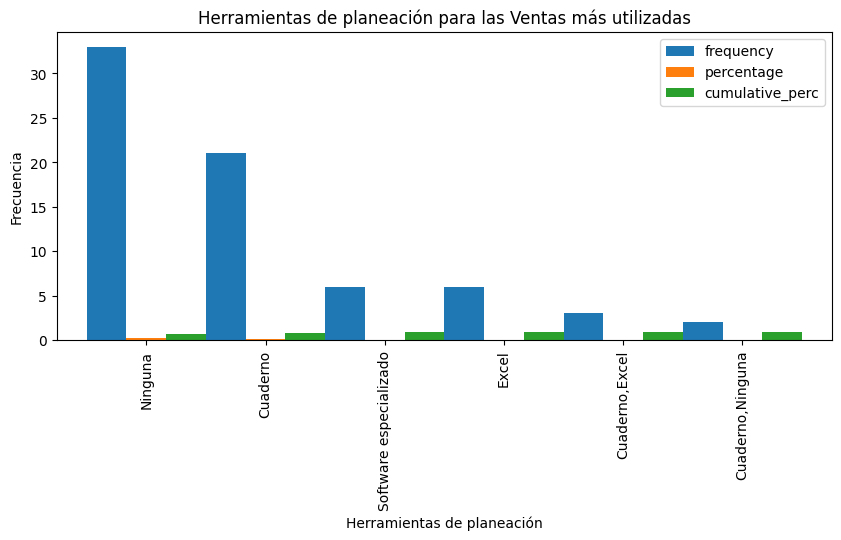

In [37]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index3.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Herramientas de planeación para las Ventas más utilizadas')
plt.xlabel('Herramientas de planeación')
plt.ylabel('Frecuencia')

In [38]:
# Obtengo un análisis univariado de una variable categórica en específico
table4 = freq_tbl(df1['18_sales_records'])
table4

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro4 = table4[(table4['frequency']>1) & (table4["frequency"] < 61)]
Filtro4

# Ajusto el índice de mi dataframe
Filtro_index4 = Filtro4.set_index('18_sales_records')
Filtro_index4

# La frecuencia de desconocidos fue de 61

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


Text(0, 0.5, 'Frecuencia')

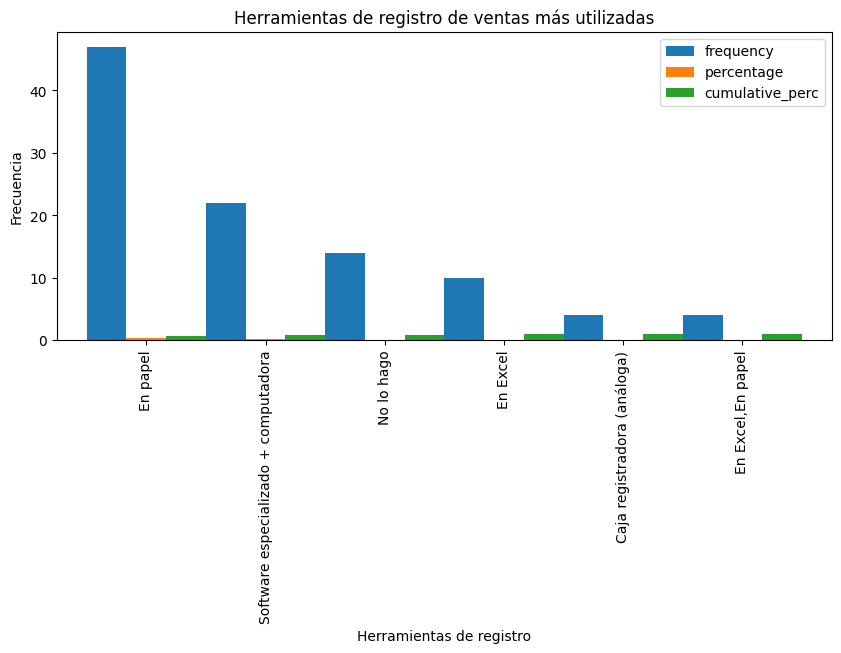

In [41]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index4.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Herramientas de registro de ventas más utilizadas')
plt.xlabel('Herramientas de registro')
plt.ylabel('Frecuencia')

In [44]:
# Obtengo un análisis univariado de una variable categórica en específico
table5 = freq_tbl(df1['49_inventory_records'])
table5

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro5 = table5[(table5['frequency']>1) & (table5["frequency"] < 61)]
Filtro5

# Ajusto el índice de mi dataframe
Filtro_index5 = Filtro5.set_index('49_inventory_records')
Filtro_index5

# La frecuencia de desconocidos fue de 61

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


Text(0, 0.5, 'Frecuencia')

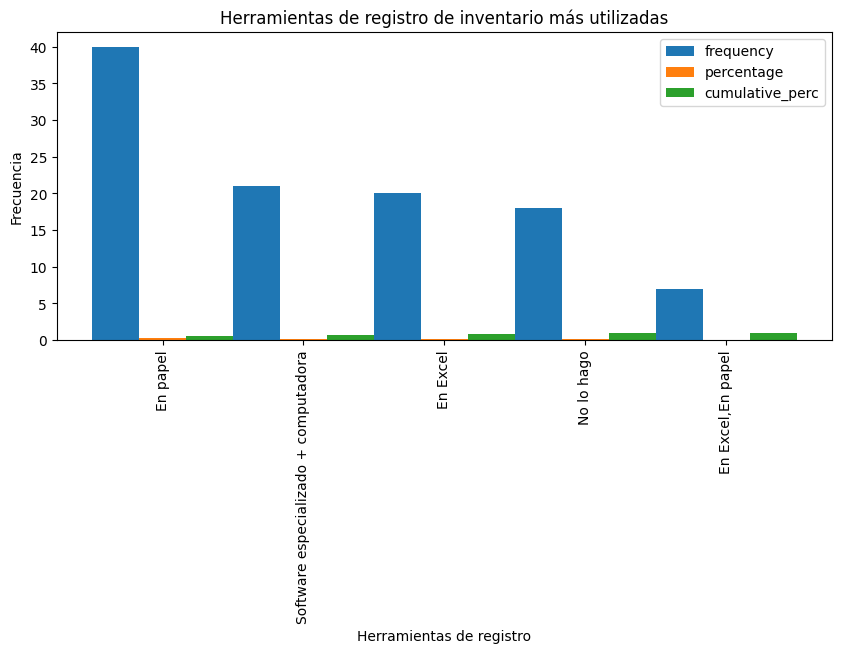

In [49]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index5.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Herramientas de registro de inventario más utilizadas')
plt.xlabel('Herramientas de registro')
plt.ylabel('Frecuencia')

In [63]:
# Obtengo un análisis univariado de una variable categórica en específico
table6 = freq_tbl(df1['5_change_store_space_last_year'])
table6

# Obtengo un filtro de los valores más relevantes de las variables catégoricas seleccionada

Filtro6 = table6[(table6['frequency']>1) & ~(table6["5_change_store_space_last_year"] == "Desconocido")]
Filtro6

# Ajusto el índice de mi dataframe
Filtro_index6 = Filtro6.set_index('5_change_store_space_last_year')
Filtro_index6

# La frecuencia de desconocidos fue de 72

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152


Text(0, 0.5, 'Frecuencia')

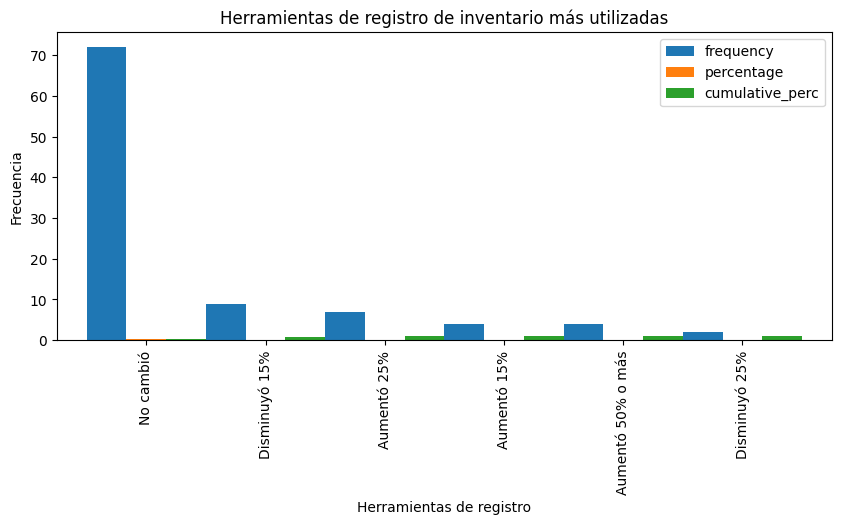

In [64]:
# Realizamos un gráfico de barras del dataframe filtrado
Filtro_index6.plot(kind = 'bar', width = 1, figsize = (10,4))
plt.title('Herramientas de registro de inventario más utilizadas')
plt.xlabel('Herramientas de registro')
plt.ylabel('Frecuencia')